In [11]:
# Import libraries
import calendar
from collections import Counter, OrderedDict
import datetime
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 500)
pd.options.display.max_colwidth = 1000
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

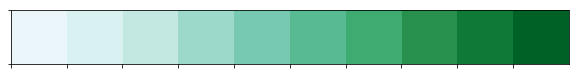

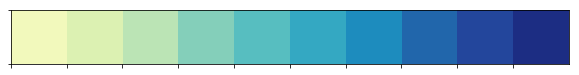

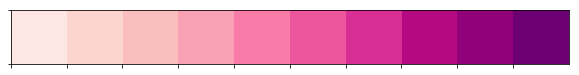

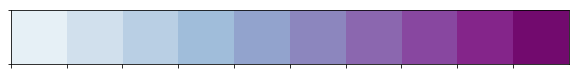

In [26]:
# Create color palettes for seaborn
sns.palplot(sns.color_palette("BuGn", 10))
sns.palplot(sns.color_palette("YlGnBu", 10))
RdPu = ['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177','#49006a']
sns.palplot(sns.color_palette("RdPu", 10))
BuPu = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
sns.palplot(sns.color_palette("BuPu", 10))

In [77]:
# Import CSV files
trivago_path = "../data/train.csv"
hotels_path = "../data/hotels_items.csv"

# Create DataFrame
trivago_df = pd.read_csv(trivago_path)
hotels_df = pd.read_csv(hotels_path, usecols = ["item_id", "properties", "city", "price"])

In [78]:
# Convert UNIX time stamp (timestime column) to UTC 
date_conv = lambda x: datetime.datetime.utcfromtimestamp(x).strftime("%Y-%m-%d")
time_conv = lambda x: datetime.datetime.utcfromtimestamp(x).strftime("%H:%M:%S")
trivago_df["date"] = trivago_df["timestamp"].map(date_conv)
trivago_df["time"] = trivago_df["timestamp"].map(time_conv)

In [84]:
# Day of the week
trivago_df["day_of_week"] = trivago_df["timestamp"].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime("%A"))

In [85]:
# Drop UNIX timestamp
trivago_df.drop("timestamp", axis = 1, inplace = True)

In [86]:
trivago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15932992 entries, 0 to 15932991
Data columns (total 14 columns):
user_id            object
session_id         object
step               int64
action_type        object
reference          object
platform           object
city               object
device             object
current_filters    object
impressions        object
prices             object
date               object
time               object
day_of_week        object
dtypes: int64(1), object(13)
memory usage: 1.7+ GB


In [51]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727491 entries, 0 to 727490
Data columns (total 4 columns):
item_id       727491 non-null int64
properties    727491 non-null object
city          727491 non-null object
price         727491 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 22.2+ MB


In [52]:
# Split of pipe
hotels_df["properties"] = hotels_df["properties"].str.split("|")

# Convert all properties to lowercase
hotels_df["properties"] = hotels_df["properties"].apply(lambda x: [w.lower() for w in x])

# Create list
properties_list = hotels_df["properties"].tolist()

# Find set of unique properties and convert to a list
unique_properties = list(chain(*[list(set(tags)) for tags in properties_list]))

In [53]:
# Count unique properties
def count_items(l):
    
    # Create a counter object
    counts = Counter(l)
    
    # Sort by highest count first and place in ordered dictionary
    counts = sorted(counts.items(), key = lambda x: x[1], reverse = True)
    counts = OrderedDict(counts)
    
    return counts

properties_count = count_items(unique_properties)

In [64]:
properties_count

OrderedDict([('satisfactory rating', 438056),
             ('good rating', 396316),
             ('car park', 391003),
             ('wifi (rooms)', 372202),
             ('shower', 352839),
             ('television', 347953),
             ('wifi (public areas)', 329085),
             ('very good rating', 309039),
             ('hotel', 302804),
             ('openable windows', 288803),
             ('non-smoking rooms', 283500),
             ('air conditioning', 276736),
             ('central heating', 262558),
             ('house / apartment', 262530),
             ('free wifi (combined)', 261528),
             ('hairdryer', 245303),
             ('free wifi (rooms)', 241211),
             ('fridge', 237540),
             ('desk', 225816),
             ('free wifi (public areas)', 220596),
             ('luxury hotel', 216378),
             ('from 2 stars', 205227),
             ('terrace (hotel)', 203977),
             ('business hotel', 202919),
             ('telephone', 19559

In [54]:
hotels_df.head()

,item_id,properties,city,price
0,5101,"[satellite tv, golf course, airport shuttle, cosmetic mirror, safe (hotel), telephone, hotel, sitting area (rooms), reception (24/7), air conditioning, hypoallergenic rooms, cable tv, hotel bar, pool table, bathtub, satisfactory rating, room service, luxury hotel, terrace (hotel), television, minigolf, business hotel, shower, cot, gym, hairdryer, hypoallergenic bedding, accessible parking, from 3 stars, good rating, radio, 4 star, from 4 stars, family friendly, desk, tennis court (indoor), balcony, wifi (public areas), openable windows, express check-in / check-out, restaurant, laundry service, ironing board, tennis court, from 2 stars, business centre, bowling, conference rooms, electric kettle, accessible hotel, porter, bike rental, non-smoking rooms, car park, safe (rooms), fitness, fan, flatscreen tv, computer with internet, wifi (rooms), lift, central heating]","Mutterstadt, Germany",85.0
1,5416,"[satellite tv, cosmetic mirror, safe (hotel), telephone, hotel, sitting area (rooms), reception (24/7), wheelchair accessible, hypoallergenic rooms, hotel bar, bathtub, satisfactory rating, luxury hotel, terrace (hotel), very good rating, television, business hotel, shower, cot, hairdryer, from 3 stars, good rating, radio, 4 star, from 4 stars, family friendly, desk, wifi (public areas), openable windows, spa (wellness facility), laundry service, free wifi (combined), from 2 stars, conference rooms, sauna, bike rental, free wifi (rooms), non-smoking rooms, car park, flatscreen tv, excellent rating, computer with internet, pet friendly, wifi (rooms), free wifi (public areas), lift]","Passau, Germany",106.0
2,5910,"[satellite tv, sailing, cosmetic mirror, telephone, hotel, cable tv, hotel bar, bathtub, satisfactory rating, room service, luxury hotel, terrace (hotel), television, business hotel, shower, from 3 stars, good rating, radio, 4 star, from 4 stars, family friendly, tennis court (indoor), wifi (public areas), openable windows, restaurant, laundry service, free wifi (combined), tennis court, from 2 stars, solarium, conference rooms, bike rental, non-smoking rooms, car park, concierge, safe (rooms), computer with internet, pet friendly, free wifi (public areas), lift, central heating]","Hamburg, Germany",114.0
3,6066,"[satellite tv, sailing, diving, cosmetic mirror, safe (hotel), telephone, hotel, sitting area (rooms), reception (24/7), wheelchair accessible, hypoallergenic rooms, cable tv, massage, hotel bar, pool table, bathtub, satisfactory rating, room service, luxury hotel, terrace (hotel), towels, television, business hotel, shower, steam room, spa hotel, swimming pool (outdoor), cot, gym, hairdryer, beach, hypoallergenic bedding, beauty salon, accessible parking, from 3 stars, convention hotel, good rating, radio, 4 star, from 4 stars, table tennis, family friendly, desk, tennis court (indoor), balcony, wifi (public areas), surfing, hot stone massage, openable windows, spa (wellness facility), restaurant, laundry service, ironing board, free wifi (combined), tennis court, romantic, boat rental, from 2 stars, business centre, solarium, bowling, conference rooms, sauna, hammam, accessible hotel, bike rental, free wifi (rooms), non-smoking rooms, playground, car park, safe (rooms), fitness, ...","Stralsund, Germany",114.0
4,6094,"[satellite tv, sailing, safe (hotel), telephone, hotel, hotel bar, bathtub, satisfactory rating, luxury hotel, television, minigolf, business hotel, shower, hairdryer, good rating, radio, desk, tennis court (indoor), wifi (public areas), horse riding, openable windows, laundry service, tennis court, 3 star, non-smoking rooms, car park, safe (rooms), computer with internet, wifi (rooms), central heating]","Wolfsburg, Germany",108.0


In [55]:
# Split city and country
location_df = hotels_df["city"].str.split(",", expand = True)

In [56]:
# Sanity check
location_df.head()

,0,1,2
0,Mutterstadt,Germany,None
1,Passau,Germany,None
2,Hamburg,Germany,None
3,Stralsund,Germany,None
4,Wolfsburg,Germany,None


In [57]:
# Merge location with hotels df
hotels_df = pd.merge(location_df, hotels_df[["item_id", "properties", "price"]], left_index = True, 
                          right_index = True, how = "right")

In [58]:
hotels_df.head()

,0,1,2,item_id,properties,price
0,Mutterstadt,Germany,None,5101,"[satellite tv, golf course, airport shuttle, cosmetic mirror, safe (hotel), telephone, hotel, sitting area (rooms), reception (24/7), air conditioning, hypoallergenic rooms, cable tv, hotel bar, pool table, bathtub, satisfactory rating, room service, luxury hotel, terrace (hotel), television, minigolf, business hotel, shower, cot, gym, hairdryer, hypoallergenic bedding, accessible parking, from 3 stars, good rating, radio, 4 star, from 4 stars, family friendly, desk, tennis court (indoor), balcony, wifi (public areas), openable windows, express check-in / check-out, restaurant, laundry service, ironing board, tennis court, from 2 stars, business centre, bowling, conference rooms, electric kettle, accessible hotel, porter, bike rental, non-smoking rooms, car park, safe (rooms), fitness, fan, flatscreen tv, computer with internet, wifi (rooms), lift, central heating]",85.0
1,Passau,Germany,None,5416,"[satellite tv, cosmetic mirror, safe (hotel), telephone, hotel, sitting area (rooms), reception (24/7), wheelchair accessible, hypoallergenic rooms, hotel bar, bathtub, satisfactory rating, luxury hotel, terrace (hotel), very good rating, television, business hotel, shower, cot, hairdryer, from 3 stars, good rating, radio, 4 star, from 4 stars, family friendly, desk, wifi (public areas), openable windows, spa (wellness facility), laundry service, free wifi (combined), from 2 stars, conference rooms, sauna, bike rental, free wifi (rooms), non-smoking rooms, car park, flatscreen tv, excellent rating, computer with internet, pet friendly, wifi (rooms), free wifi (public areas), lift]",106.0
2,Hamburg,Germany,None,5910,"[satellite tv, sailing, cosmetic mirror, telephone, hotel, cable tv, hotel bar, bathtub, satisfactory rating, room service, luxury hotel, terrace (hotel), television, business hotel, shower, from 3 stars, good rating, radio, 4 star, from 4 stars, family friendly, tennis court (indoor), wifi (public areas), openable windows, restaurant, laundry service, free wifi (combined), tennis court, from 2 stars, solarium, conference rooms, bike rental, non-smoking rooms, car park, concierge, safe (rooms), computer with internet, pet friendly, free wifi (public areas), lift, central heating]",114.0
3,Stralsund,Germany,None,6066,"[satellite tv, sailing, diving, cosmetic mirror, safe (hotel), telephone, hotel, sitting area (rooms), reception (24/7), wheelchair accessible, hypoallergenic rooms, cable tv, massage, hotel bar, pool table, bathtub, satisfactory rating, room service, luxury hotel, terrace (hotel), towels, television, business hotel, shower, steam room, spa hotel, swimming pool (outdoor), cot, gym, hairdryer, beach, hypoallergenic bedding, beauty salon, accessible parking, from 3 stars, convention hotel, good rating, radio, 4 star, from 4 stars, table tennis, family friendly, desk, tennis court (indoor), balcony, wifi (public areas), surfing, hot stone massage, openable windows, spa (wellness facility), restaurant, laundry service, ironing board, free wifi (combined), tennis court, romantic, boat rental, from 2 stars, business centre, solarium, bowling, conference rooms, sauna, hammam, accessible hotel, bike rental, free wifi (rooms), non-smoking rooms, playground, car park, safe (rooms), fitness, ...",114.0
4,Wolfsburg,Germany,None,6094,"[satellite tv, sailing, safe (hotel), telephone, hotel, hotel bar, bathtub, satisfactory rating, luxury hotel, television, minigolf, business hotel, shower, hairdryer, good rating, radio, desk, tennis court (indoor), wifi (public areas), horse riding, openable windows, laundry service, tennis court, 3 star, non-smoking rooms, car park, safe (rooms), computer with internet, wifi (rooms), central heating]",108.0


In [59]:
hotels_df.rename({0: "city"}, inplace = True, axis = 1)
hotels_df.rename({1: "country"}, inplace = True, axis = 1)
hotels_df.rename({2: "mistake"}, inplace = True, axis = 1)

In [60]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727491 entries, 0 to 727490
Data columns (total 6 columns):
city          727491 non-null object
country       727491 non-null object
mistake       4 non-null object
item_id       727491 non-null int64
properties    727491 non-null object
price         727491 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 33.3+ MB


In [61]:
# Drop mistkae
hotels_df.drop("mistake", axis = 1, inplace = True)

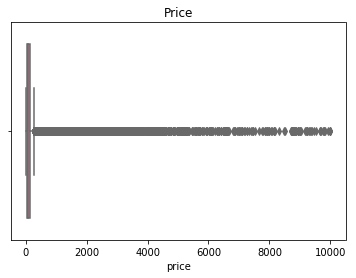

In [30]:
# Plot price distribution
sns.boxplot(x = hotels_df.price, palette = "RdPu", data = hotels_df).set_title("Price");
plt.show();

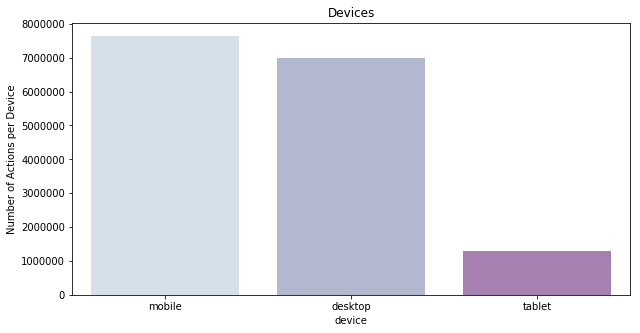

In [32]:
# Device Countplot
plt.figure(figsize = (10, 5))
sns.countplot(trivago_df["device"], alpha = .70, palette = "BuPu")
plt.title("Devices")
plt.ylabel("Number of Actions per Device")
plt.show()

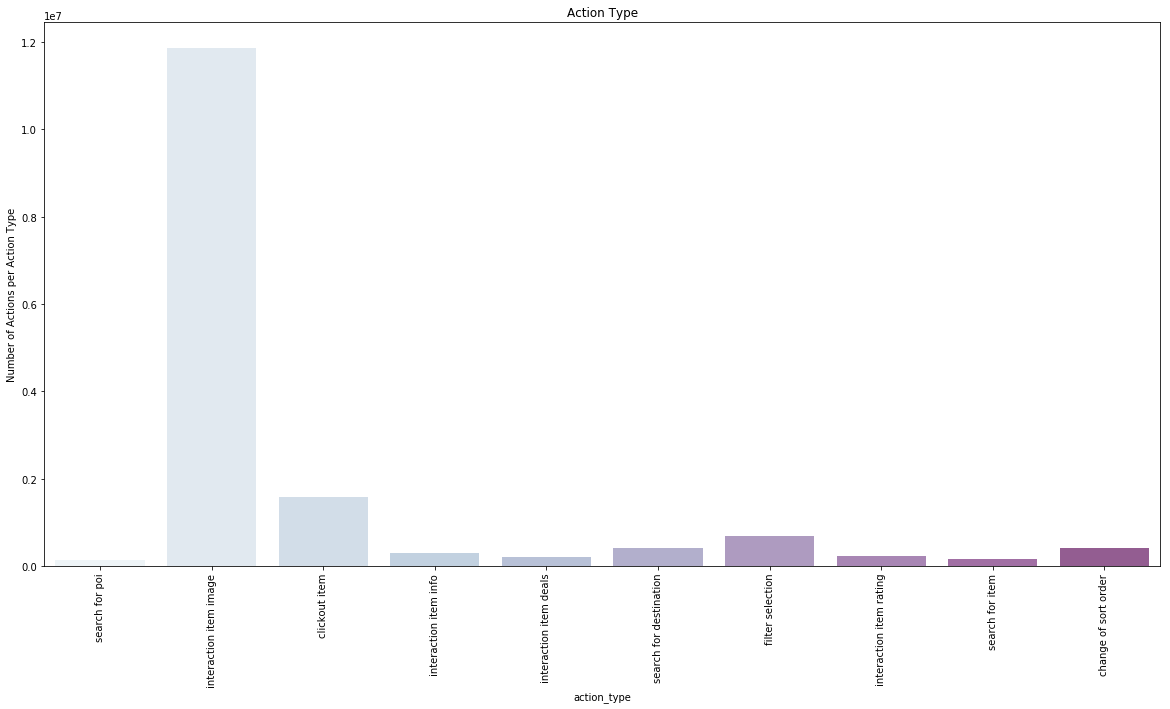

In [45]:
# Action Type Countplot
plt.figure(figsize = (20, 10))
sns.countplot(trivago_df["action_type"], alpha = .70, palette = "BuPu")
plt.title("Action Type")
plt.xticks(rotation = "vertical")
plt.ylabel("Number of Actions per Action Type")
plt.show()

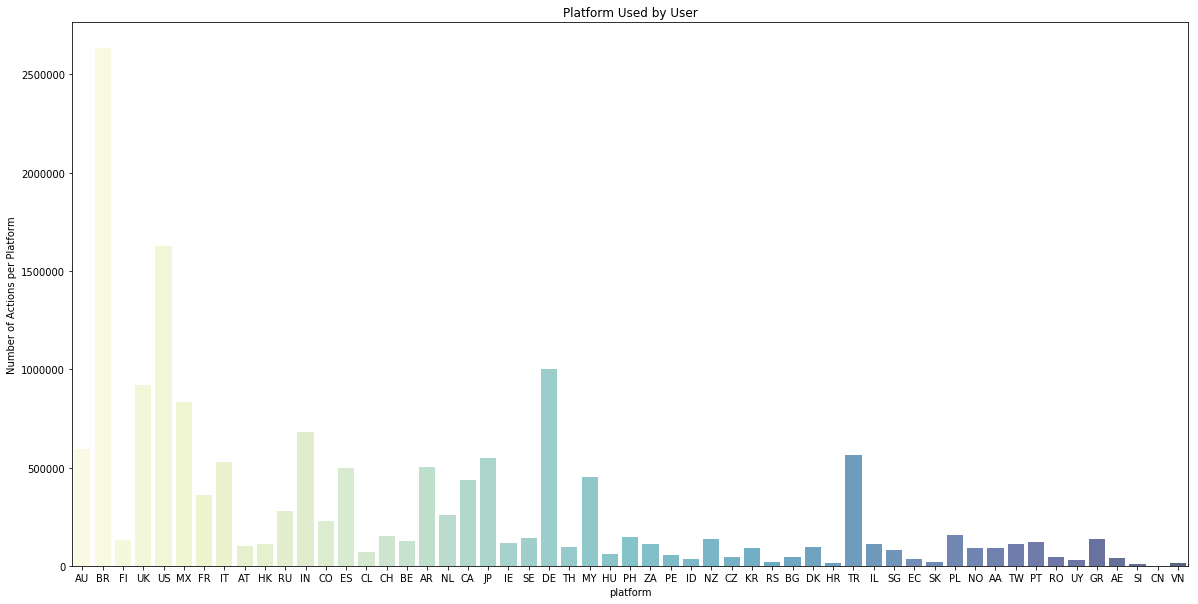

In [37]:
# Platform Countplot
plt.figure(figsize = (20, 10))
sns.countplot(trivago_df["platform"], alpha = .70, palette = "YlGnBu")
plt.title("Platform Used by User")
plt.ylabel("Number of Actions per Platform")
plt.show()

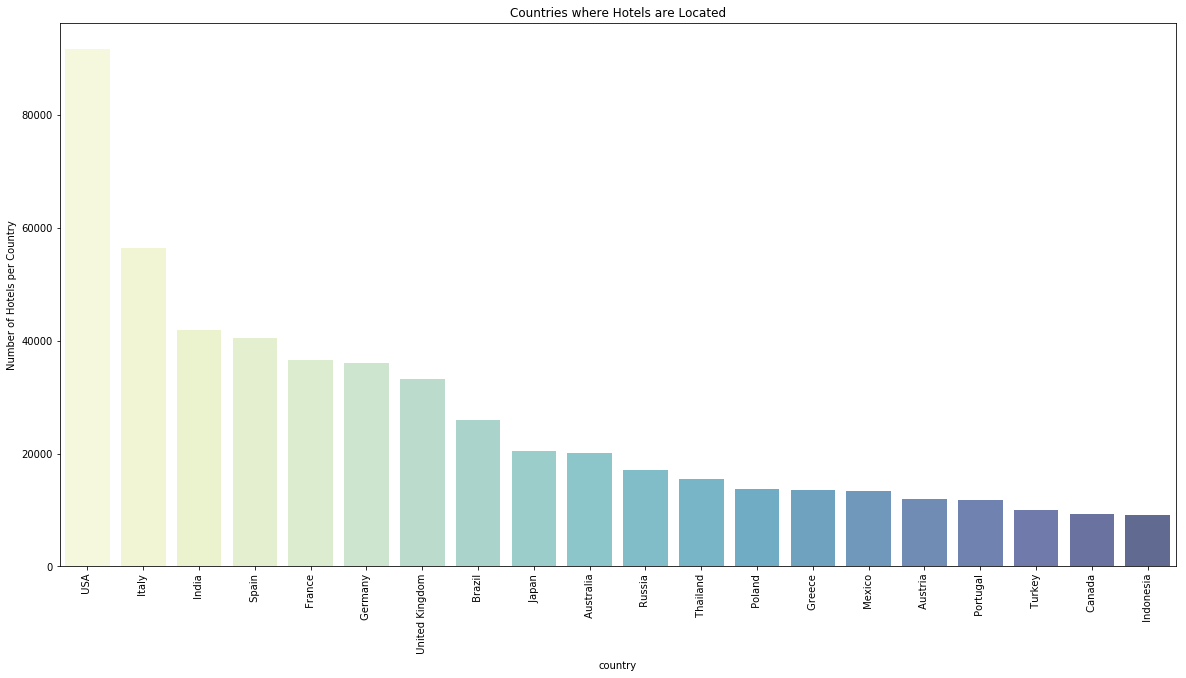

In [44]:
# Countries Countplot
plt.figure(figsize = (20, 10))
sns.countplot(hotels_df["country"], alpha = .70, palette = "YlGnBu", order = hotels_df.country.value_counts().iloc[:20].index)
plt.title("Countries where Hotels are Located")
plt.xticks(rotation = "vertical")
plt.ylabel("Number of Hotels per Country")
plt.show()

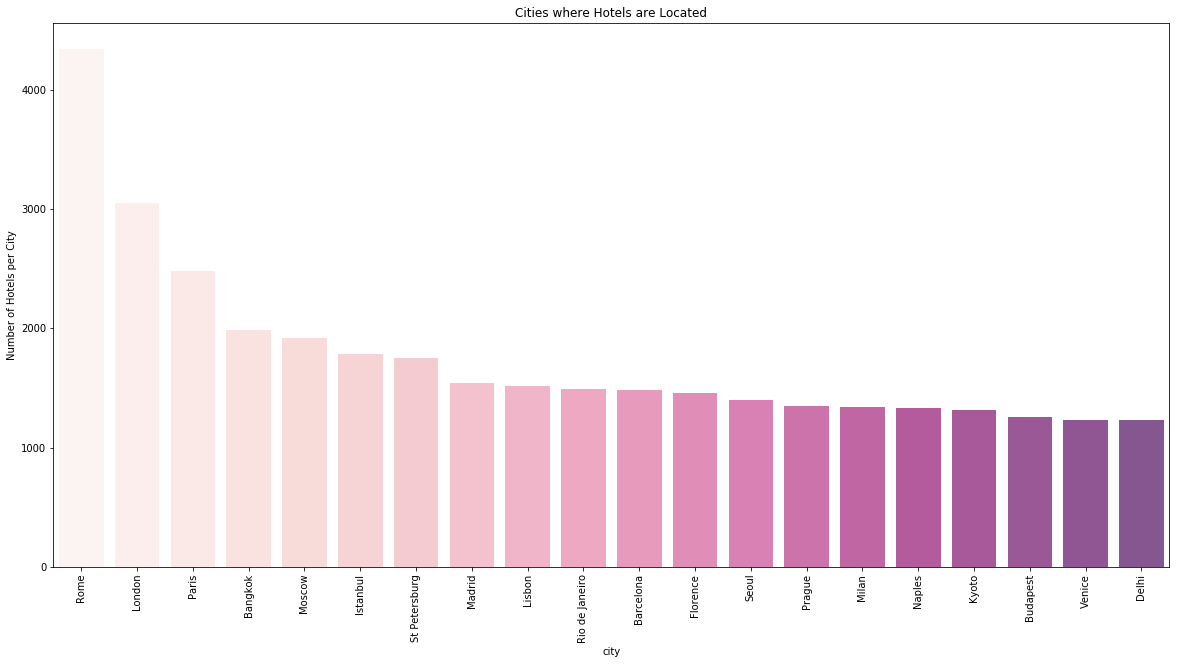

In [43]:
# Cities Countplot
plt.figure(figsize = (20, 10))
sns.countplot(hotels_df["city"], alpha = .70, palette = "RdPu", order = hotels_df.city.value_counts().iloc[:20].index)
plt.title("Cities where Hotels are Located")
plt.xticks(rotation = "vertical")
plt.ylabel("Number of Hotels per City")
plt.show()

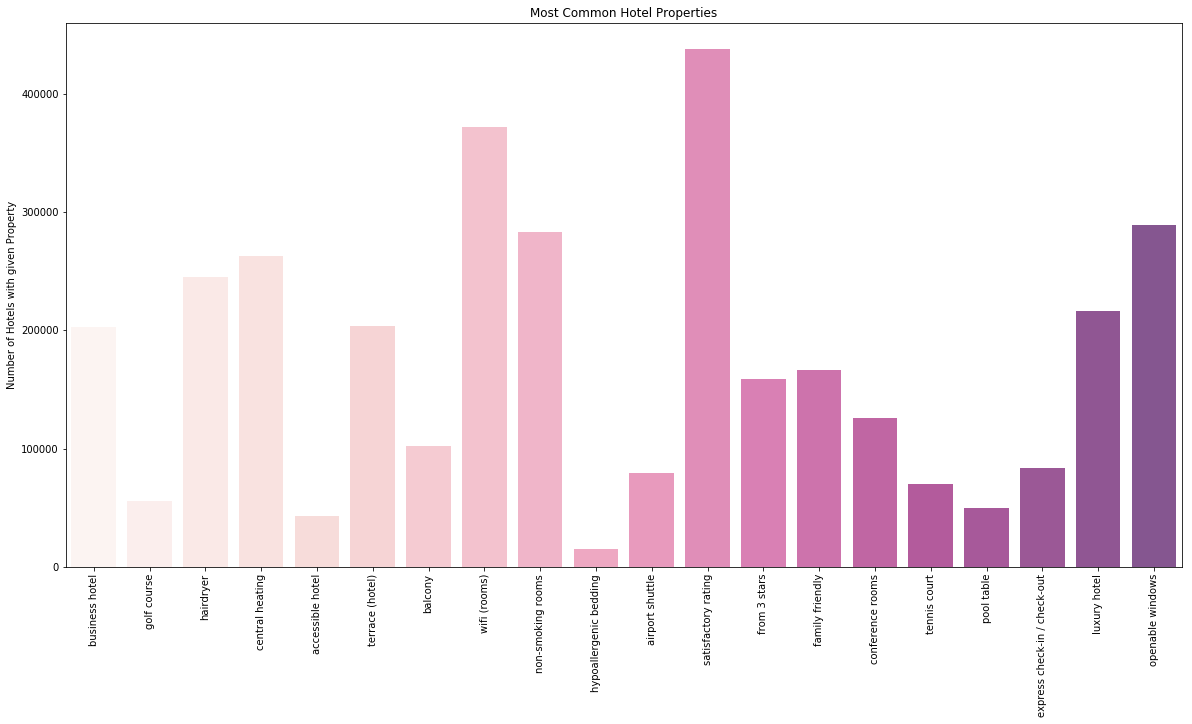

In [65]:
# Properties Countplot
plt.figure(figsize = (20, 10))
sns.countplot(unique_properties, alpha = .70, palette = "RdPu", order = unique_properties[:20])
plt.title("Most Common Hotel Properties")
plt.xticks(rotation = "vertical")
plt.ylabel("Number of Hotels with given Property")
plt.show()

In [87]:
# Create dataframe with only clickout items
trivago_clickout = trivago_df[trivago_df["action_type"] == "clickout item"]

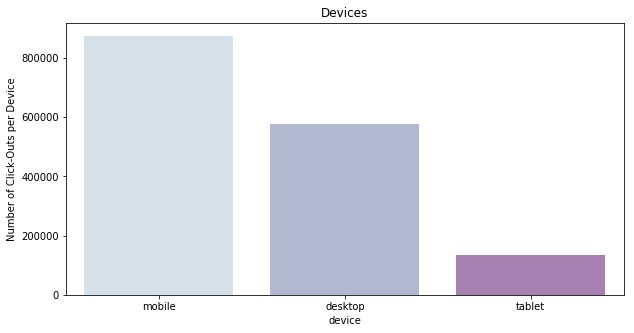

In [69]:
# Device Countplot
plt.figure(figsize = (10, 5))
sns.countplot(trivago_clickout["device"], alpha = .70, palette = "BuPu")
plt.title("Devices")
plt.ylabel("Number of Click-Outs per Device")
plt.show()

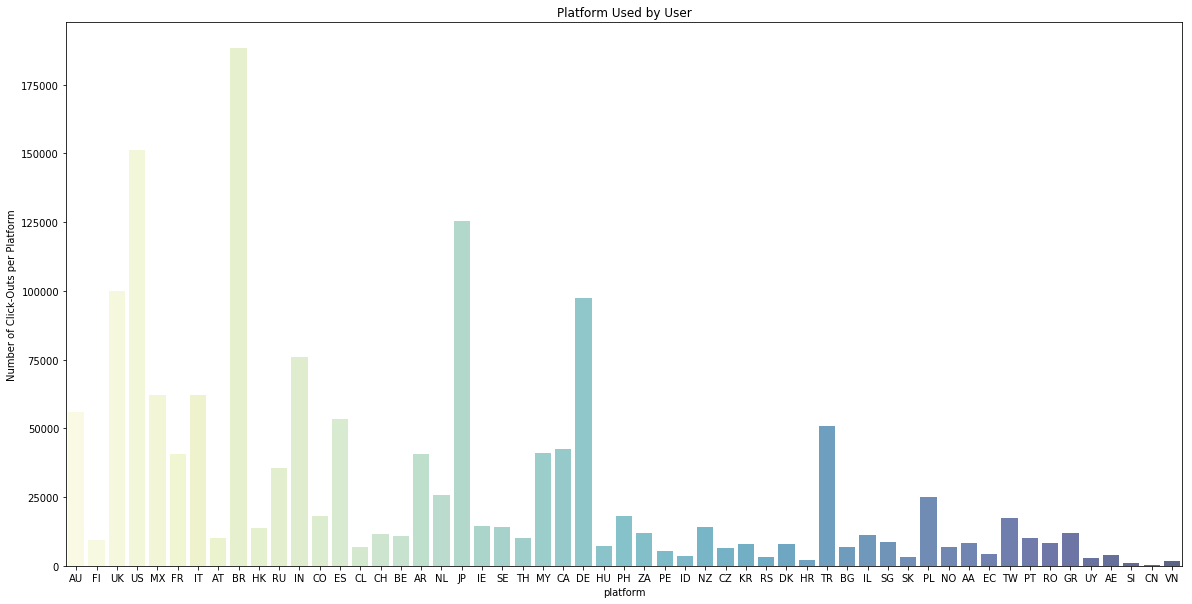

In [70]:
# Platform and Clickouts
plt.figure(figsize = (20, 10))
sns.countplot(trivago_clickout["platform"], alpha = .70, palette = "YlGnBu")
plt.title("Platform Used by User")
plt.ylabel("Number of Click-Outs per Platform")
plt.show()

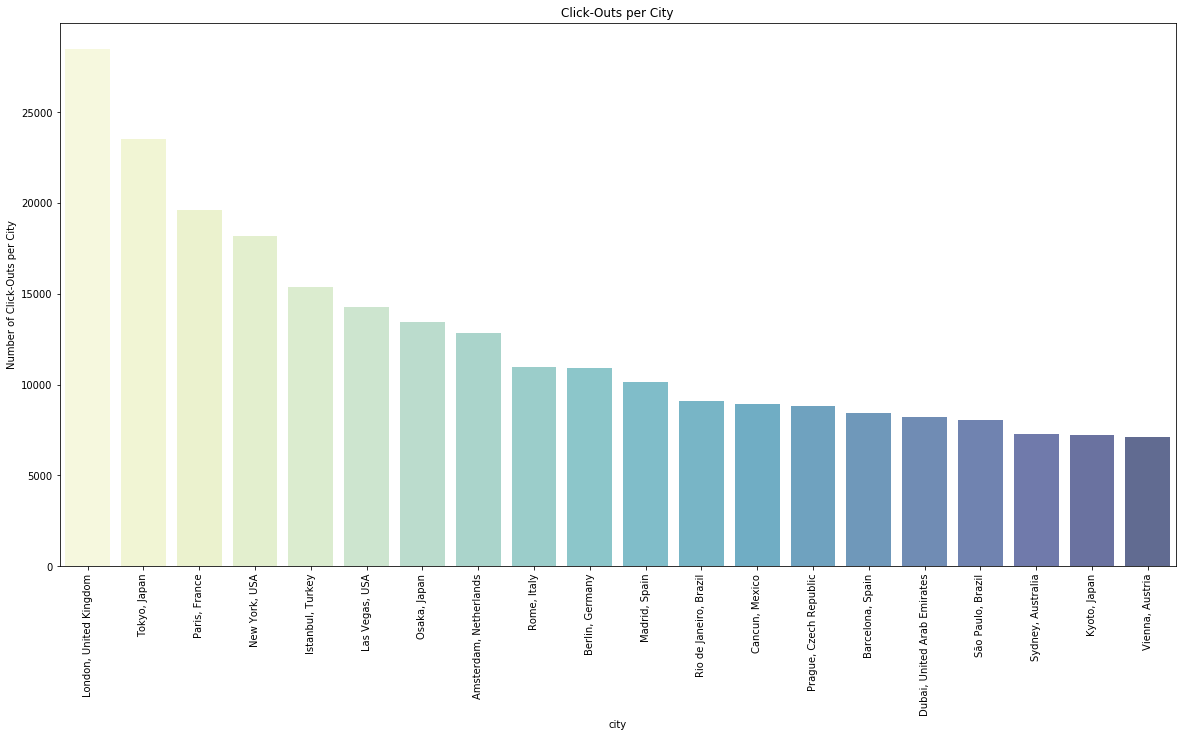

In [71]:
# Cities and Clickouts
plt.figure(figsize = (20, 10))
sns.countplot(trivago_clickout["city"], alpha = .70, palette = "YlGnBu", order = trivago_clickout.city.value_counts().iloc[:20].index)
plt.title("Click-Outs per City")
plt.xticks(rotation = "vertical")
plt.ylabel("Number of Click-Outs per City")
plt.show()

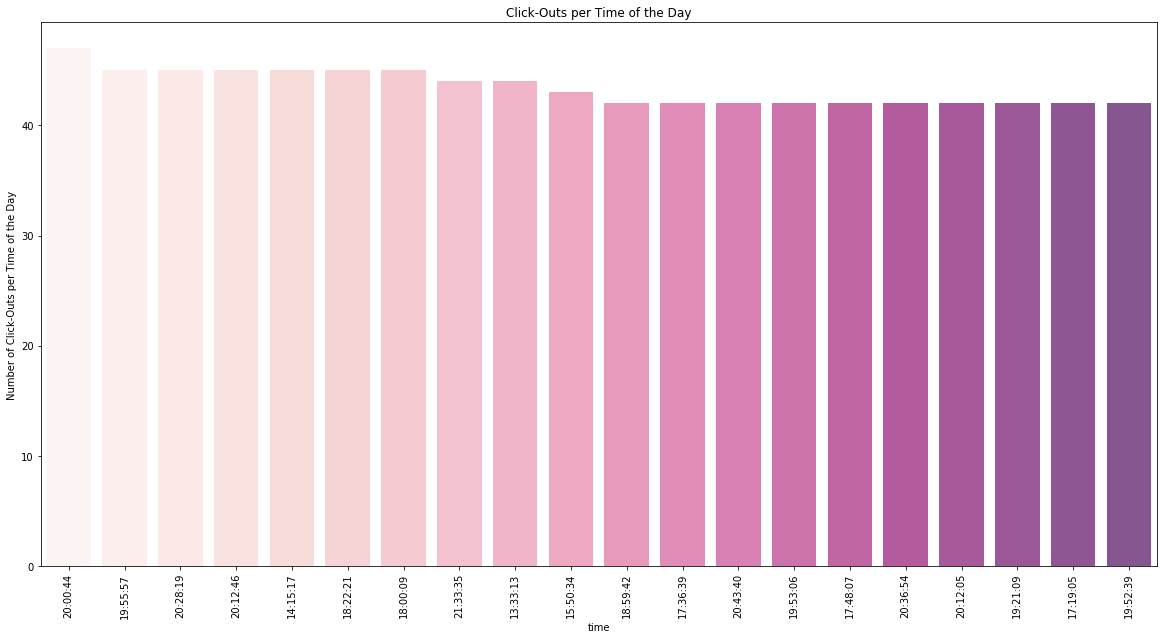

In [73]:
# Time of Day and Clickouts
plt.figure(figsize = (20, 10))
sns.countplot(trivago_clickout["time"], alpha = .70, palette = "RdPu", order = trivago_clickout.time.value_counts().iloc[:20].index)
plt.title("Click-Outs per Time of the Day")
plt.xticks(rotation = "vertical")
plt.ylabel("Number of Click-Outs per Time of the Day")
plt.show()

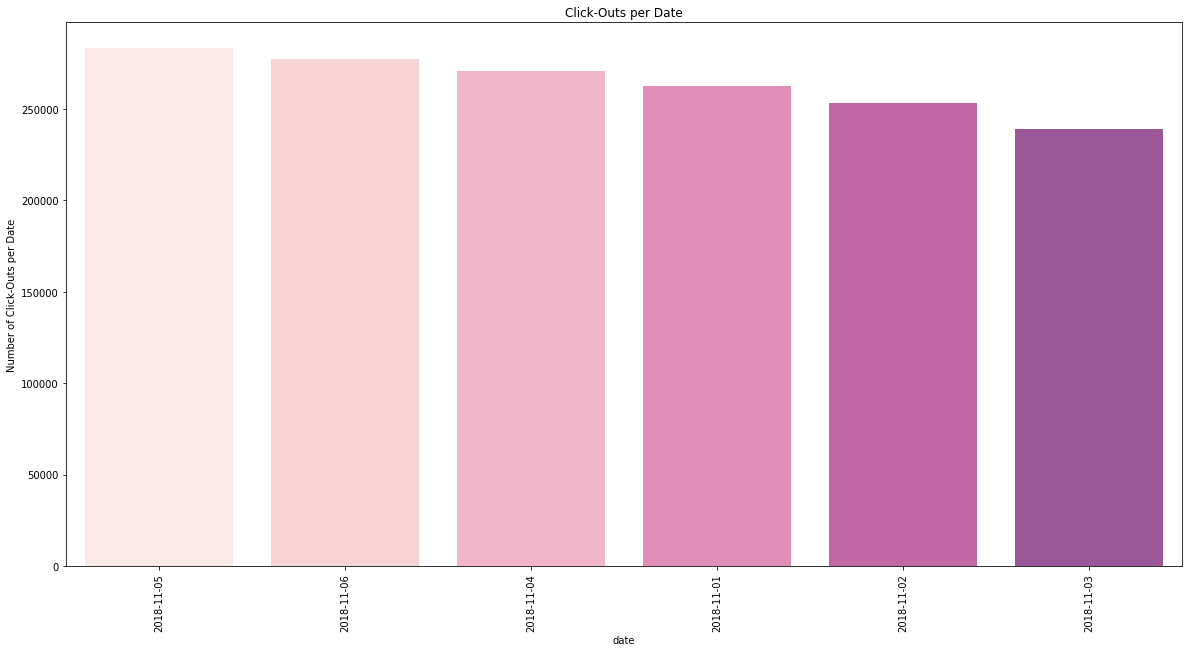

In [74]:
# Date and Clickouts
plt.figure(figsize = (20, 10))
sns.countplot(trivago_clickout["date"], alpha = .70, palette = "RdPu", order = trivago_clickout.date.value_counts().iloc[:20].index)
plt.title("Click-Outs per Date")
plt.xticks(rotation = "vertical")
plt.ylabel("Number of Click-Outs per Date")
plt.show()

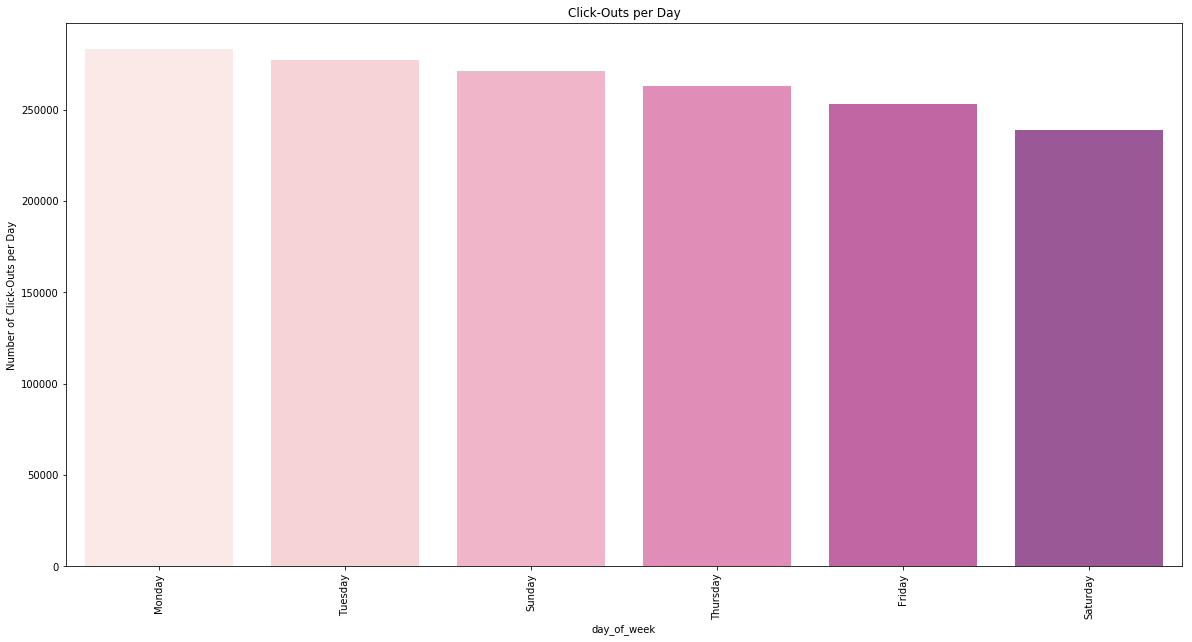

In [88]:
# Day of Week and Clickouts
plt.figure(figsize = (20, 10))
sns.countplot(trivago_clickout["day_of_week"], alpha = .70, palette = "RdPu", order = trivago_clickout.day_of_week.value_counts().iloc[:20].index)
plt.title("Click-Outs per Day")
plt.xticks(rotation = "vertical")
plt.ylabel("Number of Click-Outs per Day")
plt.show()

In [91]:
# From scraping

# Import CSV file
hotels_com_path = "../data/hotels_com_scrape.csv"

# Create DataFrame
hotels_com_df = pd.read_csv(hotels_com_path, header = None)

In [93]:
# Rename columns
hotels_com_df.rename({0: "location", 1: "hotel_name", 2: "rating", 
                      3: "address", 4: "locality", 5: "landmark", 
                      6: "price"}, inplace = True, axis = 1)

In [94]:
# Sanity check
hotels_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6128 entries, 0 to 6127
Data columns (total 7 columns):
location      6128 non-null object
hotel_name    6128 non-null object
rating        6128 non-null object
address       6128 non-null object
locality      6128 non-null object
landmark      6096 non-null object
price         6128 non-null object
dtypes: object(7)
memory usage: 335.2+ KB


In [95]:
hotels_com_df.head(300)

,location,hotel_name,rating,address,locality,landmark,price
0,"Mutterstadt, Germany",RheinCity Hotel,3.5,"Zollhofstraße 11, Ludwigshafen, RP, 67059, Germany",Ludwigshafen,5.4 miles to Mutterstadt\n3.3 miles to Mannheim (MHG),107.0
1,"Mutterstadt, Germany",NYX Hotel Mannheim by Leonardo Hotels,4.0,"F4, 4-11, Mannheim, BW, 68159, Germany",Mannheim,6.2 miles to Mutterstadt\n2.8 miles to Mannheim (MHG),78.0
2,"Mutterstadt, Germany","Radisson Blu Hotel, Mannheim",4.5,"Quadrant Q7, 27, Mannheim, 68161, Germany",Mannheim,6.4 miles to Mutterstadt\n2.3 miles to Mannheim (MHG),na
3,"Mutterstadt, Germany",ACHAT Comfort Frankenthal/Pfalz,3.5,"Mahlastrasse 18, Frankenthal, RP, 67227, Germany",Frankenthal,5.9 miles to Mutterstadt\n8.3 miles to Mannheim (MHG),84.0
4,"Mutterstadt, Germany",Leonardo Royal Hotel Mannheim,3.5,"Augustaanlage 4-8, Mannheim, BW, 68165, Germany",Mannheim,6.5 miles to Mutterstadt\n2.0 miles to Mannheim (MHG),80.0
5,"Mutterstadt, Germany",Leonardo Hotel Mannheim City Center,3.5,"N6, 3, Mannheim, BW, 68161, Germany",Mannheim,6.2 miles to Mutterstadt\n2.4 miles to Mannheim (MHG),71.0
6,"Mutterstadt, Germany",Centro Hotel Augusta,3.5,"Augustaanlage 43-45, Mannheim, 68165, Germany",Mannheim,6.8 miles to Mutterstadt\n1.6 miles to Mannheim (MHG),76.0
7,"Mutterstadt, Germany",Hotel Central,3.5,"Karolinenstraße 6, Frankenthal, RP, 67227, Germany",Frankenthal,6.4 miles to Mutterstadt\n8.5 miles to Mannheim (MHG),106.0
8,"Mutterstadt, Germany",Back to the Future Apartment,na,"R6 3-4, Mannheim, 68161, Germany",Mannheim,6.4 miles to Mutterstadt\n2.3 miles to Mannheim (MHG),na
9,"Mutterstadt, Germany",Charming Hipster Flat,na,"F4 14-15, Mannheim, 68159, Germany",Mannheim,6.2 miles to Mutterstadt\n2.7 miles to Mannheim (MHG),na


In [96]:
# Replace na values with np.nan
hotels_com_df["price"] = hotels_com_df["price"].replace("na", np.nan)

In [102]:
# Convert price to int
f = lambda x: float(x) if x != np.nan else np.nan
hotels_com_df["price"] = hotels_com_df["price"].map(f)

In [103]:
hotels_com_df.describe()

,price
count,2126.000000
mean,124.920978
std,96.220313
min,10.000000
25%,68.000000
50%,100.000000
75%,149.000000
max,977.000000


In [104]:
# Replace np.nan values with mean
hotels_com_df["price"] = hotels_com_df["price"].replace(np.nan, 125.0)

In [105]:
# Split landmark
landmarks_df = hotels_com_df["landmark"].str.split("\n", expand = True)

In [106]:
# Merge landmarks_df with hotels_com_df
hotels_com_df = pd.merge(landmarks_df, hotels_com_df[["location", "hotel_name", "rating", "address", 
                                             "locality", "price"]], left_index = True, 
                          right_index = True, how = "right")

In [107]:
hotels_com_df.rename({0: "landmark_one", 1: "landmark_two"}, inplace = True, axis = 1)

In [108]:
hotels_com_df.head(100)

,landmark_one,landmark_two,location,hotel_name,rating,address,locality,price
0,5.4 miles to Mutterstadt,3.3 miles to Mannheim (MHG),"Mutterstadt, Germany",RheinCity Hotel,3.5,"Zollhofstraße 11, Ludwigshafen, RP, 67059, Germany",Ludwigshafen,107.0
1,6.2 miles to Mutterstadt,2.8 miles to Mannheim (MHG),"Mutterstadt, Germany",NYX Hotel Mannheim by Leonardo Hotels,4.0,"F4, 4-11, Mannheim, BW, 68159, Germany",Mannheim,78.0
2,6.4 miles to Mutterstadt,2.3 miles to Mannheim (MHG),"Mutterstadt, Germany","Radisson Blu Hotel, Mannheim",4.5,"Quadrant Q7, 27, Mannheim, 68161, Germany",Mannheim,125.0
3,5.9 miles to Mutterstadt,8.3 miles to Mannheim (MHG),"Mutterstadt, Germany",ACHAT Comfort Frankenthal/Pfalz,3.5,"Mahlastrasse 18, Frankenthal, RP, 67227, Germany",Frankenthal,84.0
4,6.5 miles to Mutterstadt,2.0 miles to Mannheim (MHG),"Mutterstadt, Germany",Leonardo Royal Hotel Mannheim,3.5,"Augustaanlage 4-8, Mannheim, BW, 68165, Germany",Mannheim,80.0
5,6.2 miles to Mutterstadt,2.4 miles to Mannheim (MHG),"Mutterstadt, Germany",Leonardo Hotel Mannheim City Center,3.5,"N6, 3, Mannheim, BW, 68161, Germany",Mannheim,71.0
6,6.8 miles to Mutterstadt,1.6 miles to Mannheim (MHG),"Mutterstadt, Germany",Centro Hotel Augusta,3.5,"Augustaanlage 43-45, Mannheim, 68165, Germany",Mannheim,76.0
7,6.4 miles to Mutterstadt,8.5 miles to Mannheim (MHG),"Mutterstadt, Germany",Hotel Central,3.5,"Karolinenstraße 6, Frankenthal, RP, 67227, Germany",Frankenthal,106.0
8,6.4 miles to Mutterstadt,2.3 miles to Mannheim (MHG),"Mutterstadt, Germany",Back to the Future Apartment,na,"R6 3-4, Mannheim, 68161, Germany",Mannheim,125.0
9,6.2 miles to Mutterstadt,2.7 miles to Mannheim (MHG),"Mutterstadt, Germany",Charming Hipster Flat,na,"F4 14-15, Mannheim, 68159, Germany",Mannheim,125.0


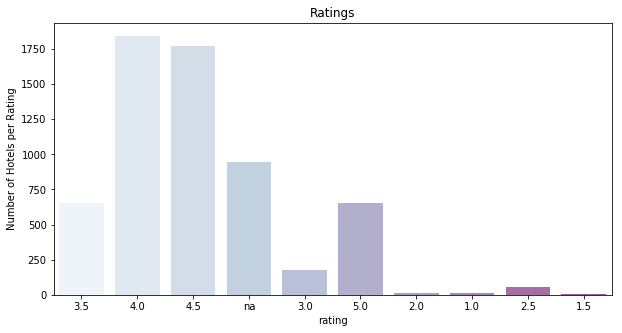

In [109]:
# Ratings Countplot
plt.figure(figsize = (10, 5))
sns.countplot(hotels_com_df["rating"], alpha = .70, palette = "BuPu")
plt.title("Ratings")
plt.ylabel("Number of Hotels per Rating")
plt.show()

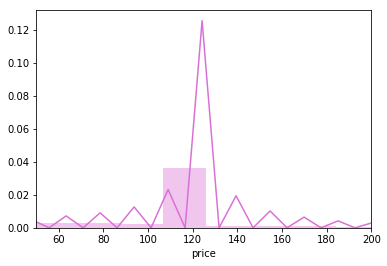

In [112]:
# Price distribution
sns.distplot(hotels_com_df["price"], color = "orchid")
plt.xlim(50, 200)
plt.show()

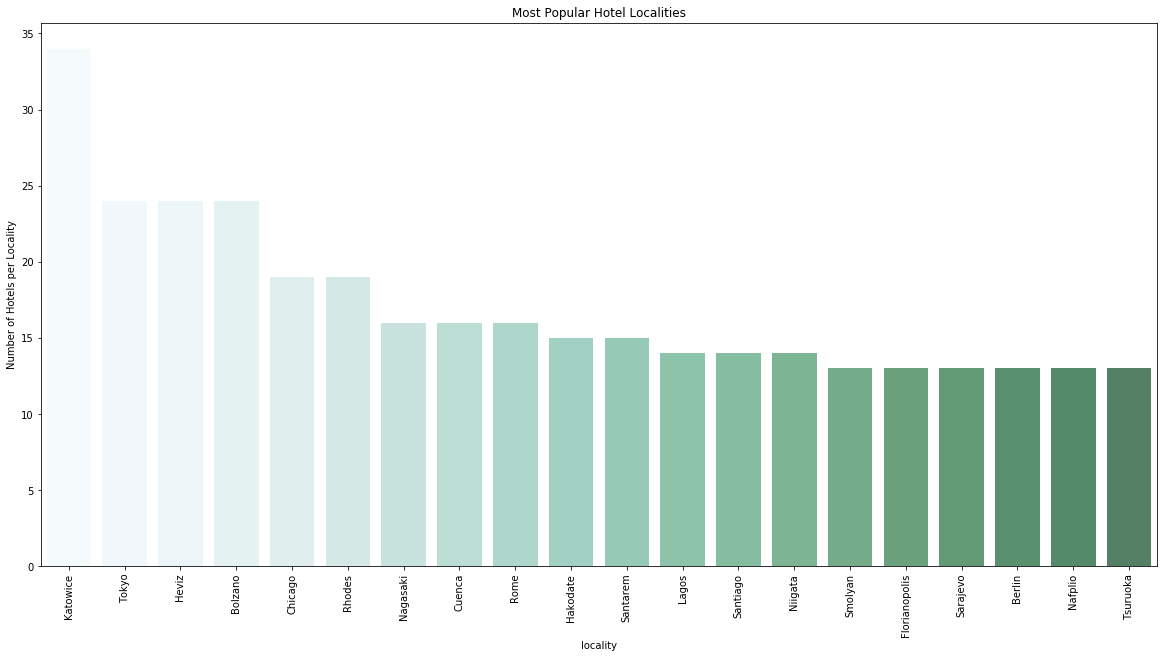

In [115]:
# Locality Countplot
plt.figure(figsize = (20, 10))
sns.countplot(hotels_com_df["locality"], alpha = .70, palette = "BuGn", order = hotels_com_df.locality.value_counts().iloc[:20].index)
plt.title("Most Popular Hotel Localities")
plt.xticks(rotation = "vertical")
plt.ylabel("Number of Hotels per Locality")
plt.show()